#  Исследование по движению цены после первой свечи за торговую сессию

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [2]:
dir_source = Path('c:/data_finam_quote_csv')  # Папка откуда берем csv файлы для обработки
file_mask = 'SPFB.RTS_5min_*.csv'  # Маска файлов, которые обрабатываем

In [3]:
files_lst = list(dir_source.glob(file_mask))  # Создаем список файлов которые будем обрабатывать
files_lst[0:5]  # Проверяем, что список файлов сформирован

[WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200103.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200106.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200108.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200109.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200110.csv')]

In [4]:
df_up = pd.DataFrame()  # Задаем пустой df куда будем писать значения закрытия свечей после повышающейся свечи
df_down = pd.DataFrame()  # Задаем пустой df куда будем писать значения закрытия свечей после понижающейся свечи

In [5]:
# В цикле обрабатываем список файлов
count_loop = 0
for file in files_lst:
    df = pd.read_csv(file, delimiter=',')  # Загружаем файл в DF
    
    # Дату в нужном формате строкой, она понадобиться для названия новой колонки с нормализованной ценой
    new_name_column = datetime.strptime(str(df.iat[0, 0]), '%Y%m%d').date()  # Дату в нужном формате строкой
    
    df = df.set_index(pd.to_datetime(df['<TIME>'], format='%H%M%S').dt.time)  # Меняем индекс и делаем его типом time
    
    # Берем самое первое по времени значение <CLOSE> к нему нормализуем цены <CLOSE> и заносим к новую колонку 
    # с датой в имени
    price_at_t0 = df.iloc[0, 5]  # Берем самое первое по времени значение (к нему нормализуем)
    df[new_name_column] = df.apply(lambda row: row['<CLOSE>'] / price_at_t0, axis=1)  # axis=1 Указывает на колонку
    
    if df.iloc[0, 2] < df.iloc[0, 5]:  # Первая свеча на повышение
        df_up = df_up.join(df[new_name_column], how='outer')  # Join с объединением ключей
    else:
        df_down = df_down.join(df[new_name_column], how='outer')  # Join с объединением ключей
#     print(type(new_name_column))

df_up

,2020-01-03,2020-01-10,2020-01-13,2020-01-15,2020-01-16,2020-01-20,2020-01-22,2020-01-24,2020-01-28,2020-01-29,...,2020-10-07,2020-10-08,2020-10-09,2020-10-19,2020-10-21,2020-10-27,2020-10-29,2020-11-03,2020-11-05,2020-11-09
<TIME>,,,,,,,,,,,,,,,,,,,,,
10:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10:05:00,1.000000,0.997693,0.999876,1.001185,1.000062,0.999757,0.999331,1.000745,1.000064,0.997347,...,0.998706,0.999653,1.000606,1.000883,0.998517,0.999564,1.003425,0.999537,0.995410,1.000168
10:10:00,0.998531,0.998628,0.998949,1.000561,1.001423,1.000182,0.997751,1.000186,1.000257,0.997852,...,0.997930,0.996788,1.001298,1.001678,0.998604,0.999390,1.005091,1.000370,0.995234,1.004451
10:15:00,0.997127,0.999875,0.998578,1.001060,1.001361,0.999211,0.998541,1.000497,1.001541,0.999179,...,0.997930,0.998785,1.002683,1.000618,0.999913,0.997559,1.002499,1.002592,0.996028,1.006802
10:20:00,0.997510,0.999252,1.000247,1.001247,1.000371,1.000121,0.996960,1.000869,1.000963,0.998926,...,0.998361,0.999653,1.003289,1.002650,1.000698,0.997646,1.001203,1.001759,0.999912,1.004199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:25:00,0.991571,1.005176,1.005934,1.005425,1.001423,1.001214,0.983040,0.992862,1.011367,0.996716,...,0.987665,1.001389,1.003116,0.994435,0.997121,0.980384,1.003517,1.022498,1.032480,1.027628
23:30:00,0.992082,1.005300,1.006243,1.005113,1.000928,1.001274,0.983526,0.992118,1.011238,0.996589,...,0.987837,1.001476,1.003549,0.995318,0.997382,0.979948,1.002592,1.023331,1.030803,1.028300
23:35:00,0.992465,1.005425,1.006243,1.005300,1.000928,1.001335,0.984134,0.991683,1.011045,0.996716,...,0.987492,1.001650,1.003462,0.996025,0.997993,0.980645,1.000926,1.023609,1.029568,1.029476


In [6]:
df_down

,2020-01-06,2020-01-08,2020-01-09,2020-01-14,2020-01-17,2020-01-21,2020-01-23,2020-01-27,2020-01-30,2020-02-05,...,2020-10-16,2020-10-20,2020-10-22,2020-10-23,2020-10-26,2020-10-28,2020-10-30,2020-11-02,2020-11-06,2020-11-10
<TIME>,,,,,,,,,,,,,,,,,,,,,
10:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10:05:00,0.999033,1.000703,1.000627,0.999016,0.999444,1.000490,0.999938,1.000827,0.999098,0.998643,...,1.002917,0.998934,0.999560,0.999652,0.998964,1.000538,0.994924,0.999331,0.996455,0.995645
10:10:00,0.999936,1.004665,1.004074,0.998585,0.999938,1.000858,1.000623,0.999618,1.000258,0.995736,...,1.003535,0.996979,1.001583,0.999304,0.998964,0.997132,0.990788,1.001625,0.997665,0.997535
10:15:00,1.000129,1.004409,1.004826,0.999754,1.000556,1.000613,1.001183,1.000382,0.999742,0.995672,...,1.002917,0.998045,1.001670,0.997999,0.996805,0.997580,0.992104,0.998375,1.000605,1.004601
10:20:00,0.999807,1.004665,1.005327,1.000000,1.002038,1.000919,1.001370,1.000572,0.999807,0.996253,...,1.003182,0.998578,1.002110,0.998347,0.997064,0.996057,0.991916,0.991685,1.003891,1.008299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:25:00,1.012182,1.020703,1.003447,0.987202,1.012349,1.002144,0.999440,0.985566,0.998454,1.012984,...,0.995669,1.013505,1.011254,1.013134,0.988428,0.959401,0.998214,1.025041,1.014872,1.013065
23:30:00,1.011408,1.020639,1.003573,0.987510,1.011917,1.001286,0.999253,0.985248,0.998776,1.012468,...,0.995669,1.013683,1.011957,1.013830,0.987997,0.961104,0.997932,1.025423,1.015737,1.012408
23:35:00,1.012117,1.020831,1.003761,0.987202,1.011794,1.001041,0.999689,0.985058,0.999549,1.012597,...,0.996818,1.013150,1.012045,1.014526,0.987997,0.960298,0.998120,1.024849,1.015997,1.011586


In [7]:
# Сохраняем в файлы для проверки
# df_up.to_excel('example_up.xlsx')
# df_down.to_excel('example_down.xlsx')

In [8]:
# Проверяем на пустые значения
print(df_up.isna().sum().sum())
print(df_down.isna().sum().sum())

112
130


In [9]:
# Заполняем NaN предыдущими значениями и опять проверяем
df_up.fillna(method='ffill', inplace=True)
df_down.fillna(method='ffill', inplace=True)
print(df_up.isna().sum().sum())
print(df_down.isna().sum().sum())

0
0


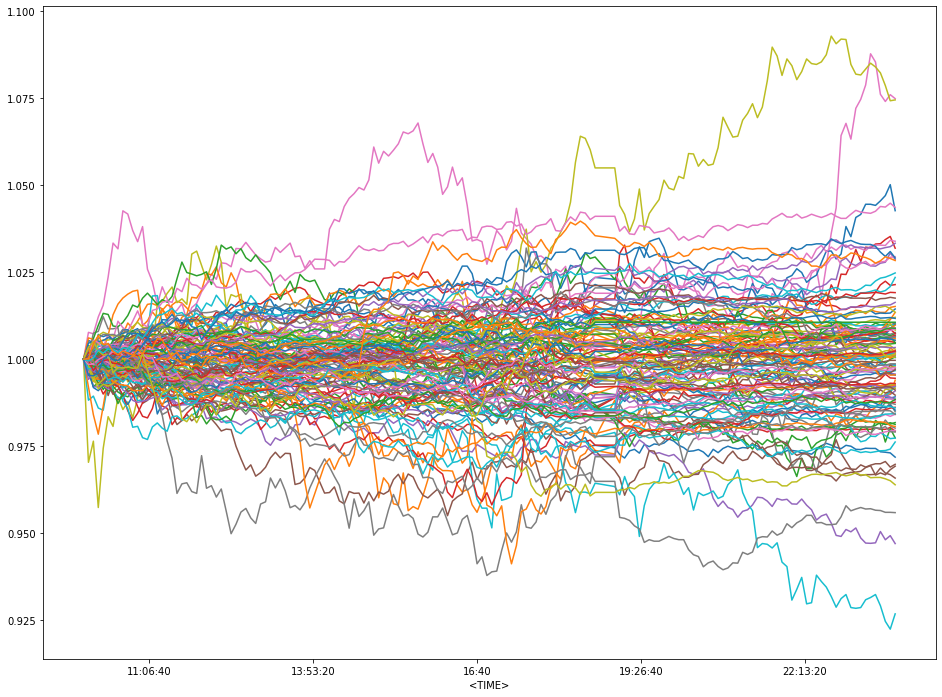

In [10]:
# Строим график
# plt.plot(df_up.index, df_up['2020-01-03'])
# plt.show()

# df_up[df_up[datetime.strptime('2020-01-03', '%Y-%m-%d').date()]].plot()

# print(datetime.strptime('2020-01-03', '%Y-%m-%d').date())
# print(df_up[datetime.strptime('2020-01-03', '%Y-%m-%d').date()])

columns_lst_up = list(df_up.columns)
# print(columns_lst_up)

for column in columns_lst_up:
    df_up[column].plot()